In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("SMSSpamCollection.tsv",sep='\t',names=['label','text'])

In [3]:
for i in range(5):
    print(df.iloc[i,-1])

I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
Nah I don't think he goes to usf, he lives around here though
Even my brother is not like to speak with me. They treat me like aids patent.
I HAVE A DATE ON SUNDAY WITH WILL!!


# Data Cleaning

In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [5]:
sn=SnowballStemmer('english')
stop=set(stopwords.words("english"))  #getting the set of all the unique stopwords

In [6]:
def clean_text(sms):
    sms=sms.lower()
    sms=re.sub("[^a-z0-9]",' ',sms)   #replacing all the special characters with space
    sms=nltk.word_tokenize(sms)
    sms=[t for t in sms if len(t)>1]  #removing some words to reduce dimentionality
    sms=[sn.stem(word) for word in sms if word not in stop] #removing stopwords
    sms=' '.join(sms)
    return sms

In [7]:
#example
clean_text("Follow  is are Your...... >>>> Dreams rs.100")

'follow dream rs 100'

In [8]:
df["clean text"]=df["text"].apply(clean_text)

In [9]:
df.head()

,label,text,clean text
0,ham,I've been searching for the right words to tha...,search right word thank breather promis wont t...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkts 21s...
2,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
3,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aid patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday


# Word Cloud

In [10]:
import wordcloud      #for visualization

In [12]:
from wordcloud import WordCloud


In [13]:
ham_data=df[df['label']=='ham']
ham_data=ham_data["clean text"]

In [14]:
def word_cloud(data):
    words=' '.join(data)
    wc=WordCloud()
    wc.generate(words)
    plt.imshow(wc)
    plt.show()

ham data


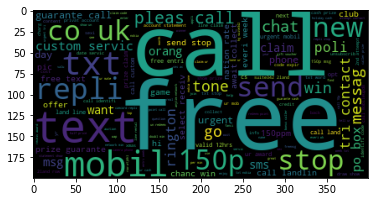

In [18]:
print("ham data")
word_cloud(ham_data)

spam data


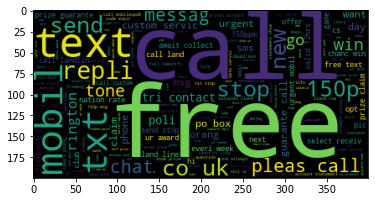

In [19]:
#doing same for spam data
ham_data=df[df['label']=='spam']
ham_data=ham_data["clean text"]

print("spam data")
word_cloud(ham_data)

# Featurization

In [22]:
from sklearn.feature_extraction.text import CountVectorizer # making features 
cv=CountVectorizer(max_features=5000)
x=cv.fit_transform(df['clean text']).toarray()
x.shape


(5568, 5000)

In [26]:
y=pd.get_dummies(df['label'])#label encoding (1 is spam and 0 is ham as we have taken encodin of second column)
y

,ham,spam
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
5563,0,1
5564,1,0
5565,1,0
5566,1,0


In [27]:
y=y['spam'].values #converting y into numy array
y

array([0, 1, 0, ..., 0, 0, 0], dtype=uint8)

# Model building

In [31]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [32]:
from sklearn.naive_bayes import MultinomialNB

In [33]:
model=MultinomialNB()
model.fit(xtrain,ytrain)

MultinomialNB()

In [35]:
y_pred=model.predict(xtest)

In [36]:
pd.DataFrame({'Actual': ytest,'Predicted':y_pred})

,Actual,Predicted
0,1,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
1109,0,0
1110,0,0
1111,0,0
1112,0,0


# Evaluation

In [37]:
model.score(xtrain,ytrain) # accuracy on training dataset

0.99034575662326

In [39]:
model.score(xtest,ytest) # accuracy on testing dataset

0.9820466786355476

In [44]:
from sklearn.metrics import confusion_matrix,f1_score,classification_report

cv=confusion_matrix(ytest,y_pred)

In [43]:
cv

array([[944,  11],
       [  9, 150]], dtype=int64)

In [47]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       955
           1       0.93      0.94      0.94       159

    accuracy                           0.98      1114
   macro avg       0.96      0.97      0.96      1114
weighted avg       0.98      0.98      0.98      1114



In [48]:
f1_score(ytest,y_pred)

0.9375